# FLOPs lookup analysis

Load a CSV exported by `extract_flops_lookup.py`, then show distribution stats and plots (FLOPs, GT, and FLOPs vs GT). Text/legends in English; comments in Chinese.



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 配置：指定要读取的 CSV 路径
CSV_PATH = Path("./flops_lookup/flops_macro_autoencoder.csv")  # 根据需要修改

# 读取 CSV
assert CSV_PATH.exists(), f"CSV not found: {CSV_PATH}"
df = pd.read_csv(CSV_PATH)
print(f"Loaded {len(df)} rows from {CSV_PATH}")
df.head()



Loaded 3256 rows from flops_lookup\flops_macro_autoencoder.csv


,arch_str,flops,gt
0,64-3334-basic,1.167815e+09,0.459142
1,64-33332-basic,1.170250e+09,0.449959
2,64-333312-basic,1.172617e+09,0.370447
3,64-33341-basic,1.177268e+09,0.469305
4,64-33314-basic,1.177285e+09,0.407868


In [19]:
# 基础统计信息
print("Columns:", df.columns.tolist())
print("\nDescribe FLOPs:")
print(df['flops'].describe())
print("\nDescribe GT:")
print(df['gt'].describe())



Columns: ['arch_str', 'flops', 'gt']

Describe FLOPs:
count    3.256000e+03
mean     1.186082e+10
std      1.450509e+10
min      1.167815e+09
25%      3.067363e+09
50%      6.706242e+09
75%      1.376564e+10
max      1.561382e+11
Name: flops, dtype: float64

Describe GT:
count    3256.000000
mean        0.506188
std         0.080474
min         0.223857
25%         0.440192
50%         0.505605
75%         0.566461
max         0.748817
Name: gt, dtype: float64


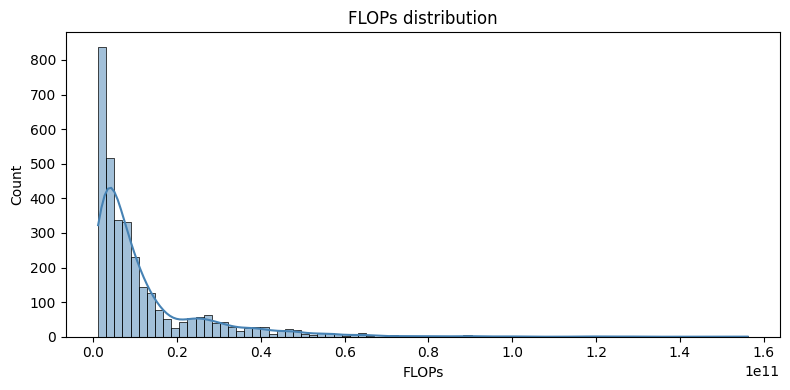

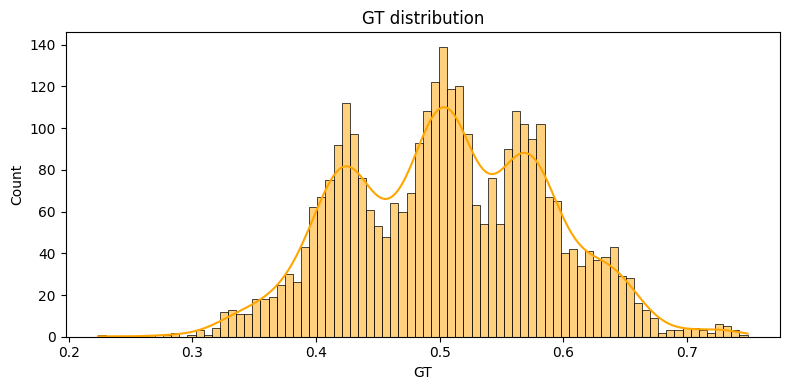

In [20]:
# FLOPs 分布直方图
plt.figure(figsize=(8, 4))
sns.histplot(df['flops'], bins=80, kde=True, color='steelblue')
plt.title('FLOPs distribution')
plt.xlabel('FLOPs')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# GT 分布直方图
plt.figure(figsize=(8, 4))
sns.histplot(df['gt'], bins=80, kde=True, color='orange')
plt.title('GT distribution')
plt.xlabel('GT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



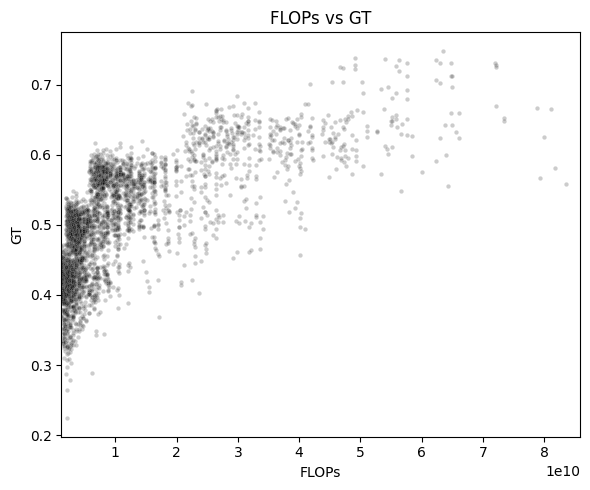

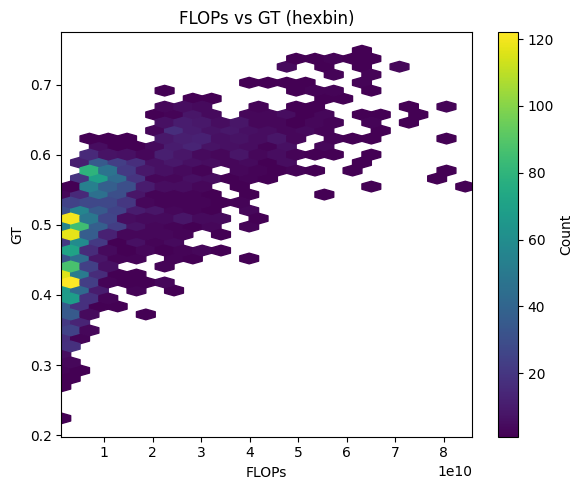

In [28]:
xlim = max(df['flops'])*0.55
# FLOPs vs GT 二维分布（散点 + 密度背景）
plt.figure(figsize=(6, 5))
# sns.kdeplot(x=df['flops'], y=df['gt'], fill=True, cmap='Blues', thresh=0.05, alpha=0.6)
sns.scatterplot(x=df['flops'], y=df['gt'], s=10, color='black', alpha=0.2)
plt.title('FLOPs vs GT')
plt.xlim(min(df['flops']), xlim)
plt.xlabel('FLOPs')
plt.ylabel('GT')
plt.tight_layout()
plt.show()

# 可选：hexbin，更清晰稀疏/密集区域
plt.figure(figsize=(6, 5))
plt.hexbin(df['flops'], df['gt'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.title('FLOPs vs GT (hexbin)')
plt.xlabel('FLOPs')
plt.xlim(min(df['flops']), xlim)
plt.ylabel('GT')
plt.tight_layout()
plt.show()

